In [1]:
import keras
from keras.datasets import mnist
import math
import tensorflow as tf
import matplotlib
import pandas
from tensorflow_history_plot import show_acc

#Importing the data
(X_train, y_train),(X_test, y_test) = mnist.load_data() 

#Normalizing the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [2]:
def tanf(x):
    return x/tf.math.sqrt(1+x*x)

def tan_h(x):
    return tf.math.tanh(x)

In [3]:
def make_model(X_train, act):
    model = keras.models.Sequential()

    #Adding the model layers
    model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True, activation=act))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.LSTM(128, activation=act))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(10, activation='softmax')) 
    
    return model

In [4]:
with tf.device('/CPU:0'):
    m = make_model(X_train, tanf)
    m.compile( loss='sparse_categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6), 
              metrics=['accuracy'] )

    #Fitting data to the model
    history_f = m.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 56s 29ms/step - loss: 0.3622 - accuracy: 0.8871 - val_loss: 0.1072 - val_accuracy: 0.9675
Epoch 2/3
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1033 - accuracy: 0.9707 - val_loss: 0.0735 - val_accuracy: 0.9786
Epoch 3/3
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0734 - accuracy: 0.9789 - val_loss: 0.0641 - val_accuracy: 0.9821


In [5]:
with tf.device('/CPU:0'):
    m = make_model(X_train, tan_h)
    m.compile( loss='sparse_categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6), 
              metrics=['accuracy'] )

    #Fitting data to the model
    history_h = m.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3395 - accuracy: 0.8921 - val_loss: 0.1027 - val_accuracy: 0.9694
Epoch 2/3
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1028 - accuracy: 0.9703 - val_loss: 0.0869 - val_accuracy: 0.9747
Epoch 3/3
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0726 - accuracy: 0.9790 - val_loss: 0.0753 - val_accuracy: 0.9784


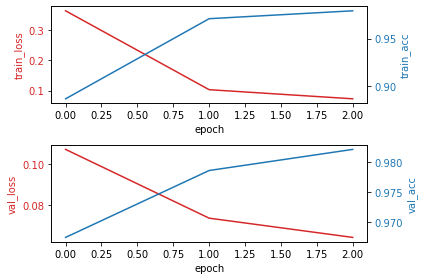

In [7]:
show_acc.plot(history_f)

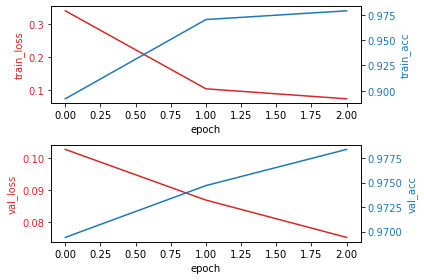

In [8]:
show_acc.plot(history_h)